<a href="https://colab.research.google.com/github/KevKil/Sup-Learn-ML-wk2/blob/main/Kevin_Kilonzo_(Machine_Learning)Supervised_Learning_WK2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEEK 2 Supervised Learning Independent Project

## Assessment Question

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

## Implimentation

### 1. Defining the Question

#### a) Specifying the Question

Create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

#### b) Defining the Metric for Success

To be able to predict future sale prices of real esttate properties with an accuracy of at least 80% 

#### c) Understanding the context 

#### d) Recording the Experimental Design

1.   Importing the libraries
2.   Reading the data
3.   Data wrangling
4.   Exploratory data analysis
5.   Data preprocessing
6.   Supervised learning
7.   Conclusions



#### e) Data relevance / Appropriateness of Data

Below is the dataset glossary:

* Id  - Unique identifier of the house
* price  - Price of the house
* bedrooms - Number of Bedrooms 
* bathrooms - Number of Bathrooms.
 Components(sink,shower,toilet bathtub with each accounting for 0.25)
* sqft_living - Square feet area of living area
* sqft_lot  - Square feet area of plot including house and surrounding land
* floors - Number of Floors
* waterfront - Whether waterfront is there or not
* view - Number of Views
* grade - Grades
* sqft_above - Square feet of area of house without area of basement
* sqft_basement - Square feet area of basement only, if house has none = 0
* yr_built - Year the house is built
* yr_renovated - Year the house is renovated
* zipcode - zipcode os the house
* lat : Latitude of the house
* lon : Longitude of the house
* sqft_living15
* sqft_lot15

## Importing libraries

In [403]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Reading data

In [404]:
# Loading the dataset
data = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')

### Data Exploration

In [405]:
# Preview of the dataset
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [406]:
# Preview of the tail of the dataset
data.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [407]:
# Checking number of rows and columns
data.shape

(21613, 20)

In [408]:
# Checking columns and their datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

## Data wrangling

In [409]:
# Checking null values
# 
data.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no null values

In [410]:
# Checking duplicates
# 
data.duplicated().sum()

3

As the number of duplicate rows is small they can be dropped wihout affecting the dataset.

In [411]:
# Dropping the duplicate values
# 
data = data.drop_duplicates()

In [412]:
# Confirming if duplicates have been dropped
# 
data.duplicated().sum()

0

In [413]:
# Dropping columns that are not necessary
# 
data = data.drop(columns=['id','sqft_living15','sqft_lot15','condition'])

* The columns 'sqft_living15' and 'sqft_lot15' were removed as the data is represented in other columns
* The column id was removed as it is unique to each observation
* Condition column was removed as the values can not be interprated

In [414]:
# Renaming the columns to appropriate names
# 
data = data.rename(columns={'sqft_living':'sqft_living_area',
                      'sqft_lot':'sqft_plot',
                      'sqft_above':'sqft_above_ground',
                      'yr_built':'year_built',
                      'yr_renovated':'year_renovated',
                      'lat':'latitude',
                      'long':'longitude'})

In [415]:
# Checking if changes have been implimented
# 
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living_area', 'sqft_plot',
       'floors', 'waterfront', 'view', 'grade', 'sqft_above_ground',
       'sqft_basement', 'year_built', 'year_renovated', 'zipcode', 'latitude',
       'longitude'],
      dtype='object')

### Outlier detection

Bedrooms column

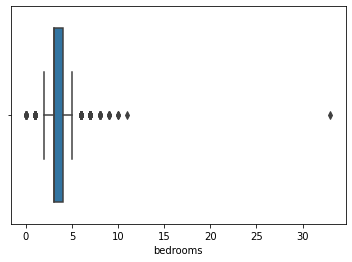

In [416]:
# Checking for outliers in bedrooms
sns.boxplot(data=data, x= 'bedrooms')

Choose to drop houses with more than 10 bedrooms as it is very unlikely. Houses with no bedrooms can be studio apartments thus will not be removed

In [417]:
# Removing outliers
# 
data = data[data['bedrooms']<=10]

# Checking if changes have been implimented
data.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 10])

Bathrooms column

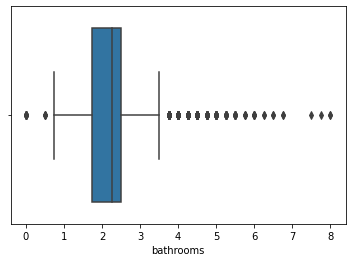

In [418]:
# Checking for outliers in bathrooms
sns.boxplot(data=data, x= 'bathrooms')

Choose to remove houses with more than six bathrooms as it is very unlikely and also remove houses with less than 0.5 bathrooms

In [419]:
# Removing outliers
# 
data = data[(data['bathrooms']<=6) & (data['bathrooms']>=0.5)]

# Checking if changes have been implimented
data.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       5.75])

Square feet living area column

In [420]:
# Checking the quartiles in sqft_living_area

print('minimum value: ' + str(data.sqft_living_area.min() ) )
print('25th quartile: ' + str(np.quantile(data.sqft_living_area, 0.25)))
print("50th quartile: " + str(np.quantile(data.sqft_living_area, 0.5)))
print('75th quartile: ' + str(np.quantile(data.sqft_living_area, 0.75)))

minimum value: 370
25th quartile: 1424.25
50th quartile: 1910.0
75th quartile: 2550.0


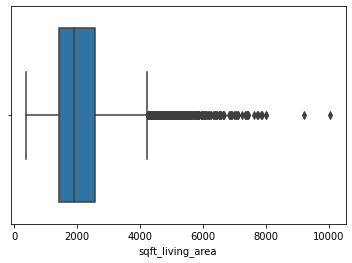

In [421]:
# Checking for outliers in sq-feet living area
sns.boxplot(data=data, x= 'sqft_living_area')

Choose to remove houses with more than 6000 square feet of living area as it is very unlikely as an average house 2079 square feet.

In [422]:
# Removing outliers
# 
data = data[data['sqft_living_area']<=6000]


Plot size column

In [423]:
# Checking the quartiles in plot size
data.sqft_plot.mean()
print('minimum value: ' + str(data.sqft_plot.min() ) )
print('25th quartile: ' + str(np.quantile(data.sqft_plot, 0.25)))
print("50th quartile: " + str(np.quantile(data.sqft_plot, 0.5)))
print('75th quartile: ' + str(np.quantile(data.sqft_plot, 0.75)))

minimum value: 520
25th quartile: 5040.0
50th quartile: 7600.0
75th quartile: 10620.0


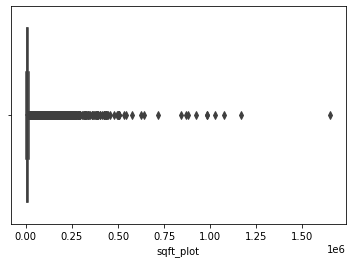

In [424]:
# Checking for outliers in sq-feet plot
sns.boxplot(data=data, x= 'sqft_plot')

Houses with more than 40000 lot size are very unlikely as the average lot size is 7619 sq-feet

In [425]:
# Removing outliers
# 
data = data[data['sqft_plot']<=30000]


***Floors column***

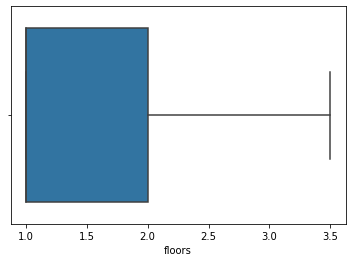

In [426]:
# Checking for outliers in number of floors
sns.boxplot(data=data, x= 'floors')

No outliers detected in floors column

***Grades column***

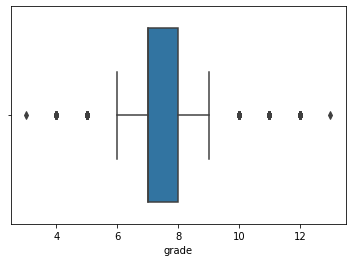

In [427]:
# Checking for outliers in the grade column
sns.boxplot(data=data, x= 'grade')

Will not remove outliers as grade is a classifier column

***Square feet above ground column***

In [428]:
# Checking the quartiles in sqft_above_ground size

print('25th quartile: ' + str(np.quantile(data.sqft_above_ground, 0.25)))
print("50th quartile: " + str(np.quantile(data.sqft_above_ground, 0.5)))
print('75th quartile: ' + str(np.quantile(data.sqft_above_ground, 0.75)))

25th quartile: 1170.0
50th quartile: 1520.0
75th quartile: 2120.0


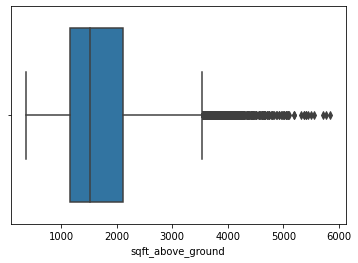

In [429]:
# Checking for outliers
sns.boxplot(data=data, x= 'sqft_above_ground')

Remove values above 4000 as they are very unlikely as the mean is 1560

In [430]:
# Removing outliers
# 
data = data[data['sqft_above_ground']<=4000]


***Square feet basement column***

In [431]:
# Selecting the houses with a basement
x = data[data['sqft_basement']>0]

In [432]:
# Checking the quartiles in houses with a basement size

print('25th quartile: ' + str(np.quantile(x.sqft_basement, 0.25)))
print("50th quartile: " + str(np.quantile(x.sqft_basement, 0.5)))
print('75th quartile: ' + str(np.quantile(x.sqft_basement, 0.75)))

25th quartile: 440.0
50th quartile: 700.0
75th quartile: 950.0


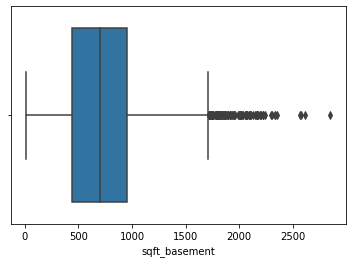

In [433]:
# Checking for outliers for houses with a basement
sns.boxplot(data=x, x= 'sqft_basement')

Remove all houses with a basement foot area of more than 2000 as they are very unlikely as the average of houses with basements is 700 sq-feet

In [434]:
# Removing outliers
# 
data = data[data['sqft_basement']<=2000]


***Years built column***

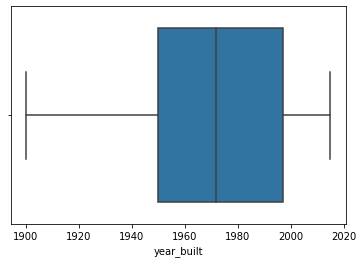

In [435]:
# Checking for outliers in year built
sns.boxplot(data=data, x= 'year_built')

No outliers detected in year built

***Year renovated***

In [436]:
# Selecting the houses which have been renovated
x = data[data['year_renovated']>0]

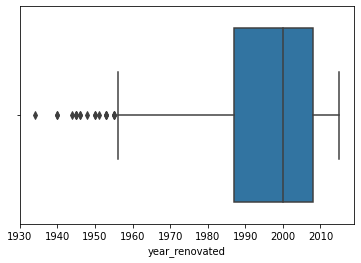

In [437]:
# Checking for outliers in year renovated
sns.boxplot(data=x, x= 'year_renovated')

Since year houses were built started in 1900 the year of renovations is in range thus no outliers will be removed

***Zip code***

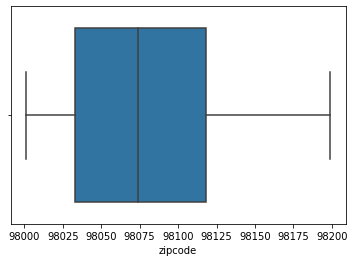

In [438]:
# Checking for outliers in zip code
sns.boxplot(data=data, x= 'zipcode')

As the range is small this implies houses come from the same area and no ouliers detected

***Latitude***

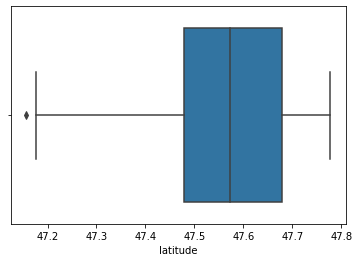

In [439]:
# Checking for outliers in latitude
sns.boxplot(data=data, x= 'latitude')

No outliers detected showing houses are from the same area

***Longitude***

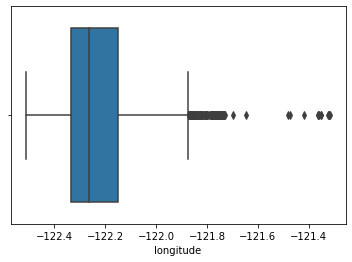

In [440]:
sns.boxplot(data=data, x= 'longitude')

The longitude values are in range thus no outlier removal. This indicates they are from the same area

## Exploratory Data analysis

### a) Univariate

In [441]:
# Statistical summary of the dataset
data.describe()

,price,bedrooms,bathrooms,sqft_living_area,sqft_plot,floors,waterfront,view,grade,sqft_above_ground,sqft_basement,year_built,year_renovated,zipcode,latitude,longitude
count,1.961500e+04,19615.000000,19615.000000,19615.000000,19615.000000,19615.000000,19615.000000,19615.000000,19615.000000,19615.000000,19615.000000,19615.000000,19615.000000,19615.000000,19615.000000,19615.000000
mean,5.107825e+05,3.340811,2.064326,1976.323579,7863.531073,1.484374,0.006067,0.211216,7.554015,1692.233495,284.090084,1969.972776,82.532348,98080.702269,47.561958,-122.226806
std,3.057722e+05,0.892644,0.723466,781.373544,4580.454340,0.542662,0.077655,0.724237,1.062024,701.857366,417.803790,29.859444,397.433149,54.232909,0.136951,0.133124
min,7.800000e+04,0.000000,0.500000,370.000000,520.000000,1.000000,0.000000,0.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.512000
25%,3.150000e+05,3.000000,1.500000,1390.000000,4980.000000,1.000000,0.000000,0.000000,7.000000,1170.000000,0.000000,1950.000000,0.000000,98033.000000,47.477900,-122.335000
50%,4.380000e+05,3.000000,2.250000,1850.000000,7246.000000,1.000000,0.000000,0.000000,7.000000,1510.000000,0.000000,1972.000000,0.000000,98074.000000,47.573000,-122.262000
75%,6.196450e+05,4.000000,2.500000,2440.000000,9612.000000,2.000000,0.000000,0.000000,8.000000,2090.000000,560.000000,1997.000000,0.000000,98118.000000,47.678900,-122.150000
max,3.650000e+06,10.000000,5.750000,5570.000000,30000.000000,3.500000,1.000000,4.000000,12.000000,4000.000000,2000.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


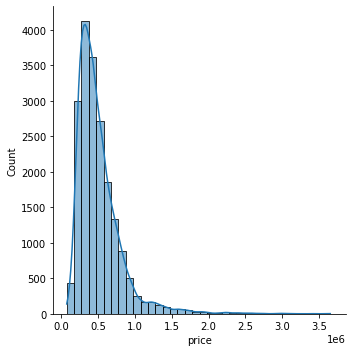

In [442]:
# Distribution plot of prices of houses
sns.displot(data=data, x= 'price',binwidth=100000, kde=True)

Most of the houses range from 200,000 and 600,000 US dollars with most houses between 300,000 and 400,000 usd

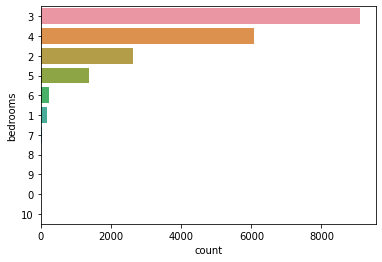

In [443]:
# Countplot of bedrooms
sns.countplot(data=data, y='bedrooms', order= data.bedrooms.value_counts().index)

Houses with three bedrooms are the most popular

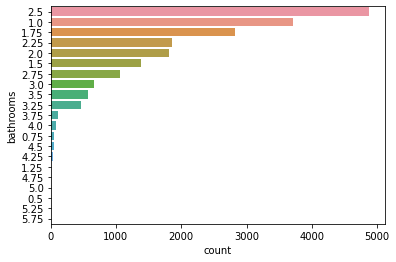

In [444]:
# Count plot of bathroom size
sns.countplot(data=data, y='bathrooms',order= data.bathrooms.value_counts().index)

Most popular bathroom is 2.5 which is 2 full bathrooms (toilet, shower, bathtub and sink) and 0.5 bathroom (usually sink and toilet)

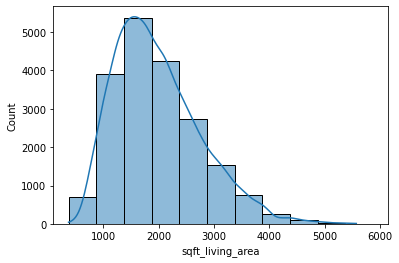

In [445]:
# Histogram of square feet living area with distribution curve
sns.histplot(data= data, x='sqft_living_area',binwidth=500, kde=True, )

Most common square feet living area is between 1500 and 2000 units

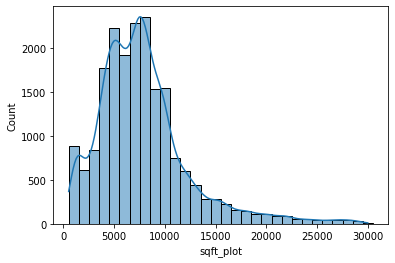

In [446]:
# Histplot of square feet plot area
sns.histplot(data= data, x='sqft_plot', binwidth=1000, kde=True)

Most of the plot area of the homes are between 4000 and 8000 square feet 

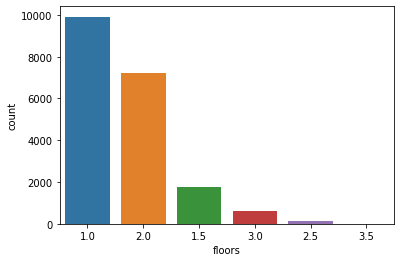

In [447]:
# Bar graph showing value counts of floors
sns.countplot(data=data, x='floors',order= data.floors.value_counts().index)

Most common house only has one floor

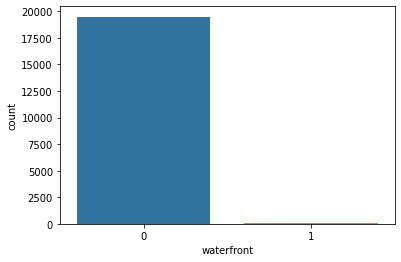

In [448]:
# Bar ploting counts of watafront house or not
sns.countplot(data=data, x='waterfront',order= data.waterfront.value_counts().index)

Almost all of the houses are not located near to or adjacent to a waterfront 

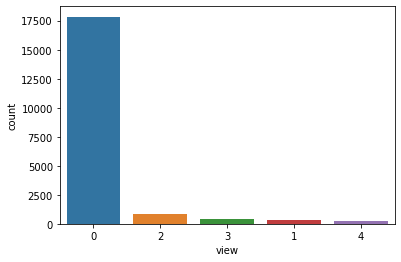

In [449]:
# Plotting viewcounts of the houses
sns.countplot(data=data, x='view',order= data.view.value_counts().index)

Most of the houses have no view meaning they are boxed in by other properties and are not tall enough to have a view

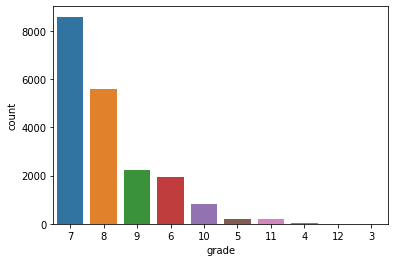

In [450]:
# Plot of housing grade values
sns.countplot(data=data, x='grade',order= data.grade.value_counts().index)

The grade of most houses is at the middle not new and with better ammenities but not deteriorating and in need of urgent repair

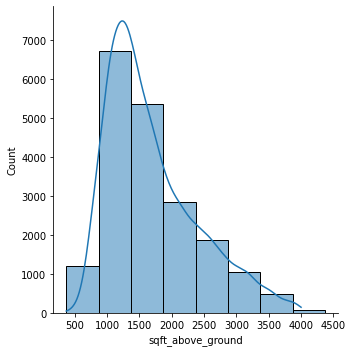

In [451]:
# Distribution plot of square feet above ground
sns.displot(data=data, x= 'sqft_above_ground',binwidth=500, kde=True)

Most house size above ground in square feet are between 900 and 1400 square feet

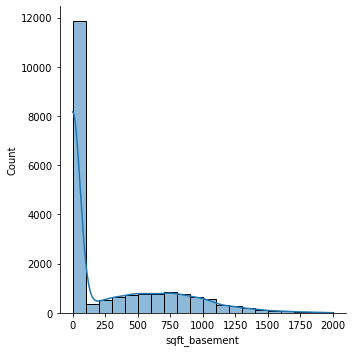

In [452]:
# Distribution plot of square feet basement
sns.displot(data=data, x= 'sqft_basement',binwidth=100, kde=True)

* Most of the houses have no basement
* Of the houses with a baement the most common size is between 700 and 800 square feet

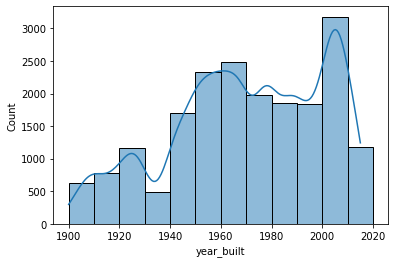

In [453]:
# Histogeam of the year the houses were built
sns.histplot(data=data, x='year_built', binwidth=10, kde=True)

The most common decade for building houses was 2010's

In [454]:
# Frequency counts of years renovated of the houses
data.year_renovated.value_counts().head(10)

0       18804
2014       90
2013       36
2005       32
2003       32
2007       30
2000       29
2004       24
2009       21
2006       21
Name: year_renovated, dtype: int64

Most of the houses have not been renovated

### b) Bivariate 

In [455]:
# Checking the correlation between numerical variables

correlations = data.corr()
correlations

,price,bedrooms,bathrooms,sqft_living_area,sqft_plot,floors,waterfront,view,grade,sqft_above_ground,sqft_basement,year_built,year_renovated,zipcode,latitude,longitude
price,1.000000,0.294558,0.465780,0.646052,0.110442,0.250055,0.247941,0.404456,0.641684,0.523873,0.328201,0.002043,0.148263,-0.014549,0.354958,-0.014231
bedrooms,0.294558,1.000000,0.509525,0.612973,0.180870,0.165556,-0.011442,0.070269,0.343623,0.498201,0.309463,0.151145,0.022003,-0.157906,-0.026198,0.137232
bathrooms,0.465780,0.509525,1.000000,0.727434,0.032226,0.510148,0.047957,0.162037,0.628690,0.649115,0.270010,0.511330,0.056808,-0.197507,0.009804,0.215655
sqft_living_area,0.646052,0.612973,0.727434,1.000000,0.251296,0.347513,0.079434,0.266444,0.721773,0.846614,0.447988,0.304807,0.065230,-0.182433,0.042789,0.214366
sqft_plot,0.110442,0.180870,0.032226,0.251296,1.000000,-0.263019,0.115858,0.136176,0.123032,0.208460,0.119786,-0.027124,0.022941,-0.230878,-0.111924,0.229435
floors,0.250055,0.165556,0.510148,0.347513,-0.263019,1.000000,0.022212,0.020463,0.459956,0.541793,-0.260226,0.493502,0.012427,-0.057180,0.037187,0.124264
waterfront,0.247941,-0.011442,0.047957,0.079434,0.115858,0.022212,1.000000,0.390594,0.072374,0.049006,0.066233,-0.023412,0.078958,0.031481,-0.008571,-0.025829
view,0.404456,0.070269,0.162037,0.266444,0.136176,0.020463,0.390594,1.000000,0.240664,0.136748,0.268583,-0.069760,0.107218,0.104946,0.028233,-0.097826
grade,0.641684,0.343623,0.628690,0.721773,0.123032,0.459956,0.072374,0.240664,1.000000,0.709422,0.158115,0.440892,0.023045,-0.169357,0.108518,0.172824
sqft_above_ground,0.523873,0.498201,0.649115,0.846614,0.208460,0.541793,0.049006,0.136748,0.709422,1.000000,-0.096541,0.430430,0.029239,-0.261363,-0.028084,0.341601


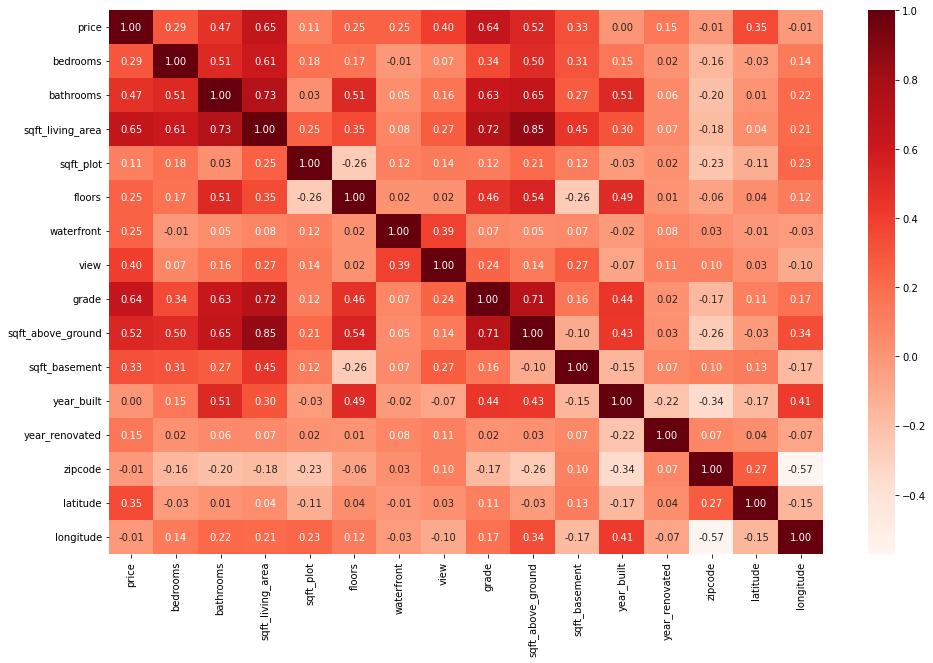

In [456]:
# Creating a correlation heat map for the columns
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot=True,cmap="Reds",fmt=".2f");
plt.show()

* Price has a strong positive correlation square foot living area and grade and price is positively correlated with bathrooms and square foot above ground
* Bedrooms has a strong positive correlation with price and positive relation with bathrooms and square foot above ground
* Bathrooms has a strong positive correlation with square foot living area, grade and square foot above ground and bedrooms has a positive relation with price, bedrooms, floors and year built
* Square foot living area has a strong positive correlation with price, bedrooms, bathrooms, grade and square foot above ground. It has a positive correlation with square foot basement
* Floors has a positive correlation with bathrooms, grade, square foot above ground and year built
* View has a positive correlation with price
* Grade has a strong positive correlation with price, bathrooms, square foot living area and square foot above ground. Grade has a positive correlation with floors and year built
* Square foot above ground has a strong positive correlation with bathroom, square foot living area and grade. It has a possitive correlation with price, bedrooms, floors and year built
* Square foot basement has a positive correlation with square foot living area
* Year built has a positive correlation with 


## Data Preprocessing

In [457]:
# Detecting multicolinierity with VIF scores
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,price,bedrooms,bathrooms,sqft_living_area,sqft_plot,floors,waterfront,view,grade,sqft_above_ground,sqft_basement,year_built,year_renovated,zipcode,latitude,longitude
price,3.223136,0.238075,-0.258775,-9.518186e-01,0.128557,-0.066473,-0.429064,-0.437878,-1.219729,-2.727507e-01,-1.108178e-01,0.902911,-0.061615,0.311638,-0.839108,0.153366
bedrooms,0.238075,1.772520,-0.465189,-6.487345e-01,-0.052297,0.059156,0.019446,0.111941,0.245500,-4.854896e-01,-2.734667e-01,0.227050,0.057946,0.103742,-0.005581,0.061219
bathrooms,-0.258775,-0.465189,3.159465,-1.941240e+00,0.172312,-0.655098,0.023003,-0.006832,-0.119400,7.883064e-01,1.013657e-02,-0.934467,-0.235521,0.062581,0.045353,0.001209
sqft_living_area,-0.949330,-0.653172,-1.937383,-1.848561e+13,-0.366146,0.830432,0.605023,-1.131974,-0.644417,1.660443e+13,9.884337e+12,0.322005,0.167768,-0.114867,0.041990,0.096894
sqft_plot,0.128557,-0.052297,0.172312,-3.644465e-01,1.425453,0.625511,-0.134500,-0.111544,-0.111658,-2.999944e-01,7.210595e-02,0.063093,-0.026254,0.152572,0.043510,-0.169088
floors,-0.066473,0.059156,-0.655098,8.306235e-01,0.625511,2.345088,-0.063952,-0.019347,-0.170415,-1.398410e+00,2.281009e-01,-0.518526,-0.105356,-0.156741,-0.085099,0.166620
waterfront,-0.429064,0.019446,0.023003,6.049850e-01,-0.134500,-0.063952,1.253893,-0.410269,0.208537,-3.677509e-01,-2.153548e-01,-0.134149,-0.039421,-0.043358,0.119638,-0.013870
view,-0.437878,0.111941,-0.006832,-1.131220e+00,-0.111544,-0.019347,-0.410269,1.448103,-0.104212,1.034875e+00,3.851263e-01,0.049698,-0.022598,-0.169961,0.201470,0.024044
grade,-1.219729,0.245500,-0.119400,-6.395834e-01,-0.111658,-0.170415,0.208537,-0.104212,3.219588,-7.093990e-01,-5.141254e-02,-0.908262,-0.012945,0.035725,-0.023135,0.222523
sqft_above_ground,-0.272070,-0.484060,0.787524,1.660443e+13,-0.298625,-1.398698,-0.367795,1.035655,-0.705373,-1.491469e+13,-8.878462e+12,-0.192434,-0.118787,-0.051780,0.363295,-0.619088


Square foot above ground and square foot living area has high VIF scores so the columns will be removed 

In [458]:
# Dropping the correlated columns and running the VIF test again
revised = data.drop(columns=['sqft_above_ground',	'sqft_basement'])

# Running VIF score test again
correlations = revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)



,price,bedrooms,bathrooms,sqft_living_area,sqft_plot,floors,waterfront,view,grade,year_built,year_renovated,zipcode,latitude,longitude
price,3.221887,0.237680,-0.247533,-1.218277,0.122406,-0.092489,-0.429152,-0.432213,-1.228829,0.901230,-0.061814,0.312509,-0.834673,0.143518
bedrooms,0.237680,1.772395,-0.461629,-1.181325,-0.054244,0.050920,0.019418,0.113735,0.242619,0.226517,0.057883,0.104017,-0.004177,0.058102
bathrooms,-0.247533,-0.461629,3.058274,-1.366201,0.227673,-0.420932,0.023796,-0.057824,-0.037494,-0.919336,-0.233736,0.054739,0.005436,0.089850
sqft_living_area,-1.218277,-1.181325,-1.366201,4.488905,-0.531429,-0.019626,0.197954,-0.132966,-1.182376,0.153462,0.040915,-0.196193,0.325906,-0.324665
sqft_plot,0.122406,-0.054244,0.227673,-0.531429,1.395165,0.497400,-0.134934,-0.083646,-0.156468,0.054815,-0.027231,0.156862,0.065348,-0.217584
floors,-0.092489,0.050920,-0.420932,-0.019626,0.497400,1.803208,-0.065787,0.098654,-0.359952,-0.553541,-0.109487,-0.138595,0.007274,-0.038504
waterfront,-0.429152,0.019418,0.023796,0.197954,-0.134934,-0.065787,1.253887,-0.409869,0.207895,-0.134267,-0.039435,-0.043297,0.119951,-0.014565
view,-0.432213,0.113735,-0.057824,-0.132966,-0.083646,0.098654,-0.409869,1.422407,-0.062938,0.057323,-0.021698,-0.173913,0.181355,0.068712
grade,-1.228829,0.242619,-0.037494,-1.182376,-0.156468,-0.359952,0.207895,-0.062938,3.153293,-0.920510,-0.014390,0.042072,0.009174,0.150776
year_built,0.901230,0.226517,-0.919336,0.153462,0.054815,-0.553541,-0.134267,0.057323,-0.920510,2.452723,0.424839,0.251131,0.065611,-0.465233


There is no multicollinerarity detected thus features and labels are ready

In [459]:
# Column values for when we scale the dataset
cols = revised.columns
cols

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living_area', 'sqft_plot',
       'floors', 'waterfront', 'view', 'grade', 'year_built', 'year_renovated',
       'zipcode', 'latitude', 'longitude'],
      dtype='object')

In [460]:
# Importing machine learning libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Standadizing the dataset
#
scaler = StandardScaler()
scaled= scaler.fit_transform(revised)

# Creating a dataframe using scaled values

data = pd.DataFrame(scaled,columns=cols)

# Spliting data into featues and labels
X = data.drop(columns=['price'])
y = data['price']

# Spliting dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=0)

## Supervised learning

While performing your regression analysis, you will be required to perform modeling using the given regression techniques then evaluate their performance. You will be then required to provide your observations and recommendation on the suitability of each of the tested models on their appropriateness of solving the given problem. 

* Multiple Linear Regression
* Quantile Regression
* Ridge Regression
* Lasso Regression
* Elastic Net Regression

### a) Multiple Linear Regression

In [373]:
# Fitting lineer regression to our model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#display the intercept / bias
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)


0.0003240342964675119
[-0.07169703  0.07397095  0.37935125 -0.03387129  0.03117302  0.13409361
  0.13254882  0.37842908 -0.27930982  0.01998717 -0.10081977  0.26109459
 -0.04853056]


In [374]:
# Creating a dataframe for coefficients
coef = pd.DataFrame(data=regressor.coef_, index=X.columns)
coef

,0
bedrooms,-0.071697
bathrooms,0.073971
sqft_living_area,0.379351
sqft_plot,-0.033871
floors,0.031173
waterfront,0.134094
view,0.132549
grade,0.378429
year_built,-0.279310
year_renovated,0.019987


Square foot living area and grade have the strongest impact on price all other coefficients being constant

In [378]:
# This is our prediction for admission based on our model
y_pred_linear = regressor.predict(X_test)


In [379]:
# Creating a dataframe of actual vs predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred_linear})
df

,Actual,Predicted
13353,0.618834,1.206003
768,-0.729743,-1.017211
18689,-0.194537,-0.446922
8172,-0.509649,-0.011541
19383,-0.345961,-0.669752
...,...,...
10901,-0.754772,-0.978133
19355,-0.444076,-0.046286
16841,0.422605,0.518892
2185,0.798057,0.588678


In [380]:
# Evaluating the Algorithm
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_linear))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_linear))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear)))
print('Variance score: {0:.2f}'.format(regressor.score(X_test, y_test)))


Mean Absolute Error: 0.373969734372824
Mean Squared Error: 0.33755311010441835
Root Mean Squared Error: 0.5809932100329731
Variance score: 0.67


* The RMSE of the linear regression model is 58% of the mean of price thus the model is not great at making predictions
* The model has a score of 67%

##### Challenging the solution

In [381]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred_linear, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()


,price
count,3923.000000
mean,0.001620
std,0.581065
min,-7.120606
25%,-0.230618
50%,0.041951
75%,0.300581
max,2.236872


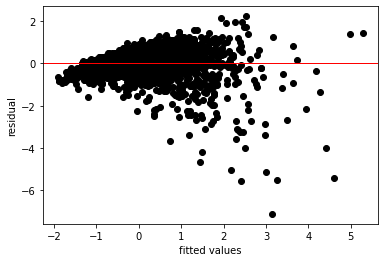

In [382]:
# Plotting predictions vs residuals
import matplotlib.pyplot as plt

plt.scatter(y_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [383]:
# Test to determine if variance is homogenous across our data
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred_linear, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred_linear)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')



inf
the variances are homogeneous!


The model has low variance and the accuracy is good would recommend using another regression model for predictions

### b) Quantile Regression

In [503]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living_area', 'sqft_plot',
       'floors', 'waterfront', 'view', 'grade', 'year_built', 'year_renovated',
       'zipcode', 'latitude', 'longitude'],
      dtype='object')

In [504]:
X

,bedrooms,bathrooms,sqft_living_area,sqft_plot,floors,waterfront,view,grade,year_built,year_renovated,zipcode,latitude,longitude
0,-0.381809,-1.471186,-1.019159,-0.483268,-0.892613,-0.078127,-0.291646,-0.521673,-0.501455,-0.207669,1.794118,-0.370639,-0.226819
1,-0.381809,0.256652,0.759805,-0.135695,0.950204,-0.078127,-0.291646,-0.521673,-0.635419,4.802106,0.816826,1.161334,-0.692561
2,-1.502105,-1.471186,-1.543889,0.466444,-0.892613,-0.078127,-0.291646,-1.463295,-1.238259,-0.207669,-0.971801,1.284739,-0.046532
3,0.738488,1.293355,-0.020891,-0.625179,-0.892613,-0.078127,-0.291646,-0.521673,-0.166544,-0.207669,1.019660,-0.300540,-1.248446
4,-0.381809,-0.088916,-0.379244,0.047260,-0.892613,-0.078127,-0.291646,0.419950,0.570260,-0.207669,-0.123586,0.400459,1.365718
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19610,-0.381809,0.602220,-0.571218,-1.469877,2.793020,-0.078127,-0.291646,0.419950,1.307064,-0.207669,0.411158,1.002879,-0.895384
19611,0.738488,0.602220,0.427049,-0.447681,0.950204,-0.078127,-0.291646,0.419950,1.474520,-0.207669,1.204055,-0.374290,-1.015575
19612,-1.502105,-1.816754,-1.223932,-1.422064,0.950204,-0.078127,-0.291646,-0.521673,1.307064,-0.207669,1.167176,0.236892,-0.542321
19613,-0.381809,0.602220,-0.481630,-1.195443,0.950204,-0.078127,-0.291646,0.419950,1.139609,-0.207669,-0.990241,-0.200501,1.185431


In [506]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf


mod = smf.quantreg('y ~ X', data)
## Similarly we can do the models for other quantiles
# 
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['X']] + res.conf_int().loc['X'].tolist())

KeyError: ignored

### c)Ridge, Lasso and Linear regression

A) Training the models
In this section we will train 4 different models:

* Linear regression (model_linear)
* Ridge regression (model_ridge)
* Lasso regression (model_lasso)
* Elastic Net regression (model_net)

In [461]:
# Importing libraries
from sklearn.linear_model import LinearRegression, Ridge,RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV



In [481]:
# Grid for alpha in ridge regression
alpha_ridge = 10**np.linspace(-3,1,100)

In [482]:
# Grid for alpha in lasso regression
alpha_lasso = 10**np.linspace(-3,1,100)

In [483]:
# Grid for alpha in elastic net
alpha_elasticnet = 10**np.linspace(-3,1,100)

In [486]:
# Getting the optimal alpha and training the model
ridgecv = RidgeCV()
ridgecv.fit(X_train, y_train)
ridgecv.alpha_
alpha_ridge_opt = ridgecv.alpha_
print(alpha_ridge_opt)

10.0


The optimal alpha for ridge regression is 10.0

In [487]:
# Getting the optimal alpha for lasso regression and training the alpha
lassocv = LassoCV()
lassocv.fit(X_train, y_train)
lassocv.alpha_
alpha_lasso_opt = lassocv.alpha_
print(alpha_lasso_opt)

0.0006498452097058471


The optimal alpha for lasso regression is 0.0006498452097058471

In [488]:
# Getting the optimal alpha for elasric net regression and training the model
elasticnetcv = ElasticNetCV()
elasticnetcv.fit(X_train, y_train)
elasticnetcv.alpha_

elasticnetcv.l1_ratio_

alpha_elasticnet_opt = elasticnetcv.alpha_
print(alpha_elasticnet_opt)
print(elasticnetcv.l1_ratio_)

0.0012996904194116942
0.5


The optimal alpha for elastic net regression is 0.0012996904194116942 with l1/l2 ratio of 0.5

Using default values the metrics are worse

In [489]:
# Instatiating the methods with the optimal alphas
model_linear = LinearRegression()
model_ridge = Ridge(alpha=alpha_ridge_opt)
model_lasso = Lasso(alpha=alpha_lasso_opt)
model_net = ElasticNet(alpha=alpha_elasticnet_opt)

In [490]:
# Fitting the methods to the data and performing predictions
y_hat_linear= model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net   = model_net.fit(X_train, y_train).predict(X_test)

In [491]:
# Creating a dataframe for the predictions
df_predictions = pd.DataFrame({'y_test':y_test,
                               'y_hat_linear':y_hat_linear,
                               'y_hat_ridge':y_hat_ridge,
                               'y_hat_lasso':y_hat_lasso,
                               'y_hat_net':y_hat_net})
df_predictions.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
13353,0.618834,1.206003,1.205347,1.200810,1.200118
768,-0.729743,-1.017211,-1.016291,-1.013328,-1.012396
18689,-0.194537,-0.446922,-0.446307,-0.445977,-0.445343
8172,-0.509649,-0.011541,-0.011710,-0.013581,-0.013737
19383,-0.345961,-0.669752,-0.669292,-0.669655,-0.669178


In [492]:
# Creating a table for the coefficients using the default alpha
coefficients = pd.DataFrame()
coefficients['model_lin']= model_linear.coef_
coefficients['model_ridge']= model_ridge.coef_
coefficients['model_lasso']= model_lasso.coef_
coefficients['model_net']= model_net.coef_
coefficients

,model_lin,model_ridge,model_lasso,model_net
0,-0.071697,-0.071411,-0.069879,-0.069576
1,0.073971,0.074079,0.073040,0.073161
2,0.379351,0.378879,0.377977,0.377484
3,-0.033871,-0.033715,-0.033074,-0.032918
4,0.031173,0.031182,0.030555,0.030557
5,0.134094,0.134006,0.133565,0.133476
6,0.132549,0.132623,0.132436,0.132513
7,0.378429,0.378199,0.378487,0.378249
8,-0.279310,-0.278920,-0.277653,-0.277255
9,0.019987,0.020069,0.019805,0.019889


In [493]:
# Metrics for linear regresion
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_linear']))
RMSE_test = np.sqrt(MSE_test)
print("MSE Linear: " + str(np.round(MSE_test ,3)))
print("RMSE Linear: " + str(np.round(RMSE_test ,3)))
print(model_linear.score(X_test,y_test))

MSE Linear: 0.338
RMSE Linear: 0.581
0.665442913371986


Linear model has an accuracy of 66.54%

In [494]:
# Metrics for Ridge regression
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_ridge']))
RMSE_test = np.sqrt(MSE_test)
print("MSE Ridge: " + str(np.round(MSE_test ,3)))
print("RMSE Ridge: " + str(np.round(RMSE_test ,3)))
print(model_ridge.score(X_test,y_test))

MSE Ridge: 0.338
RMSE Ridge: 0.581
0.6654416897466853


Metrics are similar to linear thus ridge regression is not prefered when compared to linear

In [495]:
# Meterics for lasso regression
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_lasso']))
RMSE_test = np.sqrt(MSE_test)
print("MSE lasso: " + str(np.round(MSE_test ,3)))
print("RMSE lasso: " + str(np.round(RMSE_test ,3)))
print(model_lasso.score(X_test,y_test))

MSE lasso: 0.338
RMSE lasso: 0.581
0.6654444732945402


Metrics for lasso regression are similar to linear thus linear is prefered

In [496]:
# Metrics for elastic net
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_net']))
RMSE_test = np.sqrt(MSE_test)
print("MSE Elastic net: " + str(np.round(MSE_test ,3)))
print("RMSE Elastic net: " + str(np.round(RMSE_test ,3)))
print(model_net.score(X_test,y_test))

MSE Elastic net: 0.338
RMSE Elastic net: 0.581
0.6654410435041016


Metrics for elastic net are similar to linear thus linear regression is prefered

## Conclusion

* The linear regression model has been the most accurate so far. For the lasso,ridge and elastic net regression models might be more accurate with better fine tuning
* The initial goal of achieving 80% accuracy has not been achieved 